# **Dubai_Real_Estate_Analysis_2024_Dataset**
# ***Import The Required Libraries***


In [78]:
import pandas as pd

file_path = r"D:\data_analysis\projects\dubai_data\dubai_real_estate_2024.csv"

df = pd.read_csv(file_path)

In [79]:
df.head(3)

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R..."
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...


In [80]:
df.columns

Index(['title', 'displayAddress', 'bathrooms', 'bedrooms', 'addedOn', 'type',
       'price', 'verified', 'priceDuration', 'sizeMin', 'furnishing',
       'description'],
      dtype='object')

In [81]:
df.dtypes

title             object
displayAddress    object
bathrooms         object
bedrooms          object
addedOn           object
type              object
price              int64
verified            bool
priceDuration     object
sizeMin           object
furnishing        object
description       object
dtype: object

In [82]:
# renmaed columns
df.rename(columns={
    'title': 'property_highlights',
    'displayAddress': 'full_address',
    'bathrooms': 'number_of_bathrooms',
    'bedrooms': 'number_of_bedrooms',
    'type': 'property_type',
    'price': 'price_in_aed',
    'verified': 'is_verified',
    'priceDuration': 'sale_type',
    'sizeMin': 'area_sqft',
    'furnishing': 'is_furnished'
}, inplace=True)


In [83]:
df.head(3)

,property_highlights,full_address,number_of_bathrooms,number_of_bedrooms,addedOn,property_type,price_in_aed,is_verified,sale_type,area_sqft,is_furnished,description
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R..."
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...


In [84]:
# extract only the date part as listed_date
df['listed_date'] = pd.to_datetime(df['addedOn']).dt.date

In [85]:
# drop the original addedOn column
df.drop(columns=['addedOn'], inplace=True)

In [86]:
df.head(2)

,property_highlights,full_address,number_of_bathrooms,number_of_bedrooms,property_type,price_in_aed,is_verified,sale_type,area_sqft,is_furnished,description,listed_date
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...,2024-08-14
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R...",2024-08-13


In [87]:
# extracting only city from full address
df['city'] = df['full_address'].str.split(',').str[-1].str.strip()

df['city'].unique()

array(['Dubai', 'Sharjah', 'Ajman', 'Abu Dhabi', 'Fujairah',
       'Ras Al Khaimah', 'Umm Al Quwain', 'Al Ain'], dtype=object)

In [88]:
df.head(2)

,property_highlights,full_address,number_of_bathrooms,number_of_bedrooms,property_type,price_in_aed,is_verified,sale_type,area_sqft,is_furnished,description,listed_date,city
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...,2024-08-14,Dubai
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R...",2024-08-13,Dubai


In [89]:
df.dtypes

property_highlights    object
full_address           object
number_of_bathrooms    object
number_of_bedrooms     object
property_type          object
price_in_aed            int64
is_verified              bool
sale_type              object
area_sqft              object
is_furnished           object
description            object
listed_date            object
city                   object
dtype: object

In [90]:
# Convert number of bathrooms and bedrooms to numeric
df['number_of_bathrooms'] = pd.to_numeric(df['number_of_bathrooms'], errors = 'coerce')
df['number_of_bedrooms'] = pd.to_numeric(df['number_of_bedrooms'], errors = 'coerce')

In [91]:
df['number_of_bathrooms'].dtypes

dtype('float64')

In [92]:
df['area_sqft'].head(3)

0    1323 sqft
1    1410 sqft
2    2324 sqft
Name: area_sqft, dtype: object

In [93]:
# area_sqft is a string with sqft at the end, so i will replace the string with a space'' and make the object type a numeric type 
df['area_sqft'] = df['area_sqft'].str.replace('sqft', '').str.strip()

In [94]:
df['area_sqft'].head(3)

0    1323
1    1410
2    2324
Name: area_sqft, dtype: object

In [95]:
# Now, I will convert the area_sqft column to numeric
df['area_sqft'] = pd.to_numeric(df['area_sqft'], errors = 'coerce')
df['area_sqft'].head(3)  # now it will show the dtype: int64

0    1323
1    1410
2    2324
Name: area_sqft, dtype: int64

In [96]:
df.dtypes

property_highlights     object
full_address            object
number_of_bathrooms    float64
number_of_bedrooms     float64
property_type           object
price_in_aed             int64
is_verified               bool
sale_type               object
area_sqft                int64
is_furnished            object
description             object
listed_date             object
city                    object
dtype: object

In [97]:
# Now I will convert the listed_date column to datetime from object type
df['listed_date'] = pd.to_datetime(df['listed_date'], errors = 'coerce')
df['listed_date'].head(3) # now it will show the dtype : datetime

0   2024-08-14
1   2024-08-13
2   2024-08-14
Name: listed_date, dtype: datetime64[ns]

In [98]:
print(df.duplicated().sum())

3


In [99]:
df[df.duplicated()]

,property_highlights,full_address,number_of_bathrooms,number_of_bedrooms,property_type,price_in_aed,is_verified,sale_type,area_sqft,is_furnished,description,listed_date,city
1118,5 Beds | Large Plot | Type A | Penthouse,"Alaya, Tilal Al Ghaf, Dubai",6.0,5.0,Residential for Sale,15500000,True,sell,8156,NO,Luxe Haven is pleased to introduce for sale th...,2024-06-11,Dubai
2568,Avena | Lush Green Resort Lifestyle | Sky Suite,"Avena, The Valley, Dubai",5.0,4.0,Residential for Sale,4350000,False,sell,3750,PARTLY,"Villa for sale in Avena, The Valley\n\nDiscove...",2024-08-03,Dubai
4769,A villa with a modern design for all nationali...,"Al Aamra Gardens, Al Amerah, Ajman",7.0,6.0,Residential for Sale,1760000,False,sell,3100,NO,"For sale, villa in Al-Amra area / freehold for...",2024-07-16,Ajman


In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df[df.duplicated()]

,property_highlights,full_address,number_of_bathrooms,number_of_bedrooms,property_type,price_in_aed,is_verified,sale_type,area_sqft,is_furnished,description,listed_date,city


In [102]:
df.isnull().sum()

property_highlights      0
full_address             0
number_of_bathrooms    233
number_of_bedrooms     679
property_type            0
price_in_aed             0
is_verified              0
sale_type                0
area_sqft                0
is_furnished             2
description              1
listed_date              0
city                     0
dtype: int64

In [103]:
# handling missing values
# i will put the median value of the number of bathrooms and bedrooms
df['number_of_bedrooms'] = df['number_of_bedrooms'].fillna(df['number_of_bedrooms'].median())
df['number_of_bathrooms'] = df['number_of_bathrooms'].fillna(df['number_of_bathrooms'].median())

df['is_furnished'] = df['is_furnished'].fillna(df['is_furnished'].mode()[0])
df['description'] = df['description'].fillna('No description available')
df.isnull().sum()

property_highlights    0
full_address           0
number_of_bathrooms    0
number_of_bedrooms     0
property_type          0
price_in_aed           0
is_verified            0
sale_type              0
area_sqft              0
is_furnished           0
description            0
listed_date            0
city                   0
dtype: int64

# ***A.*** **Data Summary**

In [104]:
df.shape

(5055, 13)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5055 entries, 0 to 5057
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_highlights  5055 non-null   object        
 1   full_address         5055 non-null   object        
 2   number_of_bathrooms  5055 non-null   float64       
 3   number_of_bedrooms   5055 non-null   float64       
 4   property_type        5055 non-null   object        
 5   price_in_aed         5055 non-null   int64         
 6   is_verified          5055 non-null   bool          
 7   sale_type            5055 non-null   object        
 8   area_sqft            5055 non-null   int64         
 9   is_furnished         5055 non-null   object        
 10  description          5055 non-null   object        
 11  listed_date          5055 non-null   datetime64[ns]
 12  city                 5055 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64

In [106]:
df.describe() # Numerical columns

,number_of_bathrooms,number_of_bedrooms,price_in_aed,area_sqft,listed_date
count,5055.000000,5055.000000,5.055000e+03,5055.000000,5055
mean,3.011276,2.527003,5.049646e+06,2548.215232,2024-07-06 01:50:31.691394560
min,1.000000,1.000000,1.000000e+05,82.000000,2021-06-02 00:00:00
25%,2.000000,1.000000,1.200000e+06,802.000000,2024-06-26 00:00:00
50%,3.000000,2.000000,2.350000e+06,1419.000000,2024-07-22 00:00:00
75%,4.000000,3.000000,4.499250e+06,2796.000000,2024-08-06 00:00:00
max,7.000000,7.000000,1.990000e+08,100000.000000,2024-08-19 00:00:00
std,1.653285,1.360741,1.001106e+07,3747.096663,NaN


In [107]:
df.describe(include='object') # for categorical columns

,property_highlights,full_address,property_type,sale_type,is_furnished,description,city
count,5055,5055,5055,5055,5055,5055,5055
unique,5002,1886,1,1,3,4941,8
top,Waterfront | Emaar | Luxury | PP 80/20,"Hayyan, Sharjah",Residential for Sale,sell,NO,*Luxury residential complex with a 5% down pay...,Dubai
freq,3,40,5055,5055,3630,8,4029


In [108]:
df.nunique() # number of unique distinct values in each column

property_highlights    5002
full_address           1886
number_of_bathrooms       7
number_of_bedrooms        7
property_type             1
price_in_aed           1542
is_verified               2
sale_type                 1
area_sqft              2516
is_furnished              3
description            4941
listed_date             249
city                      8
dtype: int64

In [109]:
df['city'].value_counts()

city
Dubai             4029
Abu Dhabi          370
Sharjah            267
Ras Al Khaimah     201
Ajman              169
Umm Al Quwain       11
Fujairah             4
Al Ain               4
Name: count, dtype: int64

In [110]:
df['is_furnished'].value_counts()

is_furnished
NO        3630
YES       1015
PARTLY     410
Name: count, dtype: int64

In [111]:
df['is_verified'].value_counts()

is_verified
True     3270
False    1785
Name: count, dtype: int64

In [112]:
df['is_verified'] == 'NO'

0       False
1       False
2       False
3       False
4       False
        ...  
5053    False
5054    False
5055    False
5056    False
5057    False
Name: is_verified, Length: 5055, dtype: bool

In [113]:
df['is_verified'].value_counts(normalize = True) * 100

is_verified
True     64.688427
False    35.311573
Name: proportion, dtype: float64

## **Detailed Aggregations by Key Categorical Features**

### Using Groupby to understand more

In [114]:
# Here we will understand the summary, city wise


city_group_summary = df.groupby('city').agg(
    num_listings=('city', 'size'),
    price_mean=('price_in_aed', 'mean'),
    price_median=('price_in_aed', 'median'),
    price_min=('price_in_aed', 'min'),
    price_max=('price_in_aed', 'max'),
    price_std=('price_in_aed', 'std'),
    area_mean=('area_sqft', 'mean'),
    area_median=('area_sqft', 'median'),
    area_min=('area_sqft', 'min'),
    area_max=('area_sqft', 'max'),
    area_std=('area_sqft', 'std'),
    bedrooms_mean=('number_of_bedrooms', 'mean'),
    bedrooms_median=('number_of_bedrooms', 'median'),
    bathrooms_mean=('number_of_bathrooms', 'mean'),
    bathrooms_median=('number_of_bathrooms', 'median')
).sort_values(by='num_listings', ascending=False)

city_group_summary.head(10) # Display top 10 cities by number of listings

,num_listings,price_mean,price_median,price_min,price_max,price_std,area_mean,area_median,area_min,area_max,area_std,bedrooms_mean,bedrooms_median,bathrooms_mean,bathrooms_median
city,,,,,,,,,,,,,,,
Dubai,4029,5.639645e+06,2550000.0,260000,199000000,1.099742e+07,2451.218168,1331.0,82,62803,3432.895130,2.475800,2.0,2.916605,3.0
Abu Dhabi,370,3.929052e+06,2475000.0,449999,42999888,4.539432e+06,3294.037838,1752.0,322,71419,5010.361013,2.762162,2.0,3.359459,3.0
Sharjah,267,2.278227e+06,1880000.0,245000,12057000,1.758691e+06,2774.876404,2201.0,290,19821,2406.924854,2.801498,3.0,3.674157,4.0
Ras Al Khaimah,201,2.082673e+06,1300000.0,230000,30000000,3.406006e+06,2066.870647,964.0,314,100000,7227.651733,1.935323,2.0,2.263682,2.0
Ajman,169,1.337540e+06,1250000.0,100000,11500000,1.244132e+06,2984.946746,3014.0,256,17223,2019.024025,3.443787,3.0,4.260355,3.0
Umm Al Quwain,11,6.989715e+06,10500000.0,399000,10500000,4.878558e+06,3848.181818,4815.0,514,5795,1809.987117,3.181818,4.0,4.181818,5.0
Al Ain,4,2.137564e+06,2076220.5,897813,3500000,1.069461e+06,16906.000000,16291.0,5000,30042,10382.468910,2.750000,2.0,3.000000,3.0
Fujairah,4,2.924500e+06,3149500.0,2099000,3300000,5.564174e+05,3933.250000,4097.0,1765,5774,2054.370524,3.000000,3.0,3.500000,3.5


In [115]:
# here we will understand the summary, is_furnished column wise
is_furnished_group_summary = df.groupby('is_furnished').agg(
    num_listings=('is_furnished', 'size'),
    price_mean=('price_in_aed', 'mean'),
    price_median=('price_in_aed', 'median'),
    price_min=('price_in_aed', 'min'),
    price_max=('price_in_aed', 'max'),
    price_std=('price_in_aed', 'std'),
    area_mean=('area_sqft', 'mean'),
    area_median=('area_sqft', 'median'),
    area_min=('area_sqft', 'min'),
    area_max=('area_sqft', 'max'),
    area_std=('area_sqft', 'std'),
    bedrooms_mean=('number_of_bedrooms', 'mean'),
    bedrooms_median=('number_of_bedrooms', 'median'),
    bathrooms_mean=('number_of_bathrooms', 'mean'),
    bathrooms_median=('number_of_bathrooms', 'median')
).sort_values(by='num_listings', ascending=False)

is_furnished_group_summary


,num_listings,price_mean,price_median,price_min,price_max,price_std,area_mean,area_median,area_min,area_max,area_std,bedrooms_mean,bedrooms_median,bathrooms_mean,bathrooms_median
is_furnished,,,,,,,,,,,,,,,
NO,3630,4.950175e+06,2500000.0,100000,180000000,8.967578e+06,2741.575207,1601.0,256,71419,3673.109556,2.634986,2.0,3.159504,3.0
YES,1015,5.748398e+06,2000000.0,250000,199000000,1.347497e+07,1980.181281,1047.0,82,100000,4290.689192,2.146798,2.0,2.463054,2.0
PARTLY,410,4.200498e+06,1885000.0,260000,60000000,8.527136e+06,2242.502439,1255.0,290,20486,2630.956740,2.512195,2.0,3.056098,3.0


### **Using Cross-Tabulations(Frequency of Combinations)** for two (or more) categorical variables.

In [116]:
pd.crosstab(df['is_verified'], df['is_furnished']) # we can find the number of listings verified and furnished

is_furnished,NO,PARTLY,YES
is_verified,,,
False,1299,266,220
True,2331,144,795


## **Summary of Datetime Features**

In [117]:
# Listings Count by Year 
df['listed_date'].dt.year.value_counts()

listed_date
2024    5003
2023      49
2022       2
2021       1
Name: count, dtype: int64

In [118]:
# Listings Count by month 
df['listed_date'].dt.month_name().value_counts()

listed_date
July         1935
August       1712
June          663
May           369
April         163
March          90
February       46
January        40
November       14
December       10
September       8
October         5
Name: count, dtype: int64

In [119]:
# Listings Count by Year-Month
df['listed_date'].dt.to_period('M').value_counts().sort_index(ascending=False)

listed_date
2024-08    1709
2024-07    1933
2024-06     657
2024-05     366
2024-04     163
2024-03      89
2024-02      46
2024-01      40
2023-12      10
2023-11      14
2023-10       4
2023-09       8
2023-08       3
2023-07       2
2023-06       4
2023-05       3
2023-03       1
2022-10       1
2022-06       1
2021-06       1
Freq: M, Name: count, dtype: int64

In [120]:
# Listings Count by Year-Month only in 2024
df['listed_date'].dt.to_period('M').value_counts().loc['2024'].sort_index(ascending = False)

listed_date
2024-08    1709
2024-07    1933
2024-06     657
2024-05     366
2024-04     163
2024-03      89
2024-02      46
2024-01      40
Freq: M, Name: count, dtype: int64

In [121]:
# Number of Listings in 2024
print(df['listed_date'].dt.to_period('M').value_counts().loc['2024'].sort_index(ascending = False).sum())

5003


## ***Here we have found that 5003 listing done in 2024, so this dataset best represent the year 2024.***

In [122]:
#First Listing Date: 
#Last Listing Date:
#Range of Listings (days)
#Total number of listings

print(df['listed_date'].min())
print(df['listed_date'].max())
print((df['listed_date'].max() - df['listed_date'].min()).days)
print(df['listed_date'].value_counts().sum())

2021-06-02 00:00:00
2024-08-19 00:00:00
1174
5055


## **Here I am creating a new feature 'price_per_sqft' which will help in getting know about the more detail about prices in Dubai**

In [123]:
df['price_per_sqft'] = df['price_in_aed'] / df['area_sqft']
df['price_per_sqft'].describe()

count     5055.000000
mean      1918.241045
std       1353.625623
min         30.232558
25%       1135.368884
50%       1553.784861
75%       2352.941176
max      17774.205073
Name: price_per_sqft, dtype: float64

In [124]:
df.groupby('city')['price_per_sqft'].mean().sort_values(ascending=False).head(10).round(2)

# So we have found that top 3 cities with the highest price per sqft are: Dubai, Umm Al Quwain, and Abu Dhabi

city
Dubai             2120.65
Umm Al Quwain     1747.89
Abu Dhabi         1438.68
Ras Al Khaimah    1335.29
Sharjah            935.28
Fujairah           881.72
Ajman              464.46
Al Ain             237.00
Name: price_per_sqft, dtype: float64

# ***B.*** **Univariate Analysis**
### **We have use Histograms & KDE plots to understand the distribution :** ***This section focuses on visualizing the distribution of individual columns to understand their shape, central tendency, spread, and common values.***

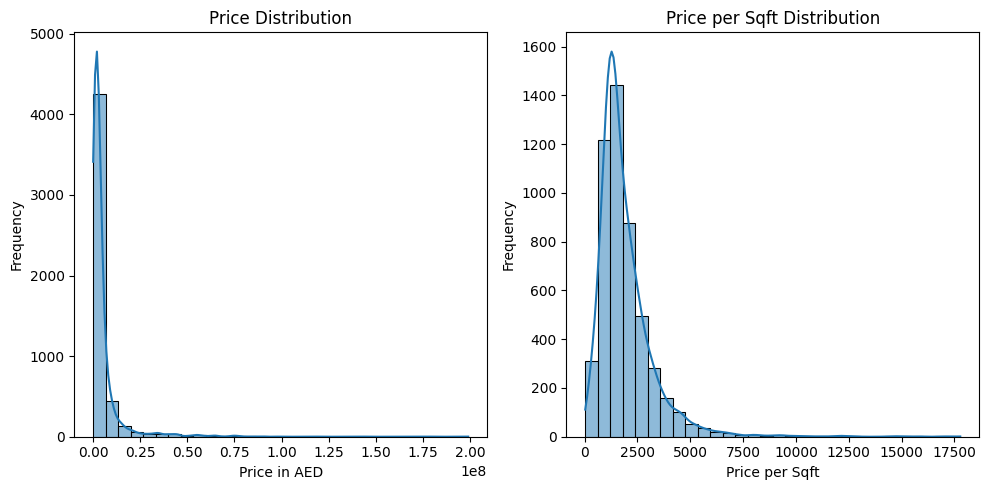

In [125]:
# Histogram for price_in_aed and price_per_sqft
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price_in_aed'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price in AED')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Price per Sqft Distribution')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


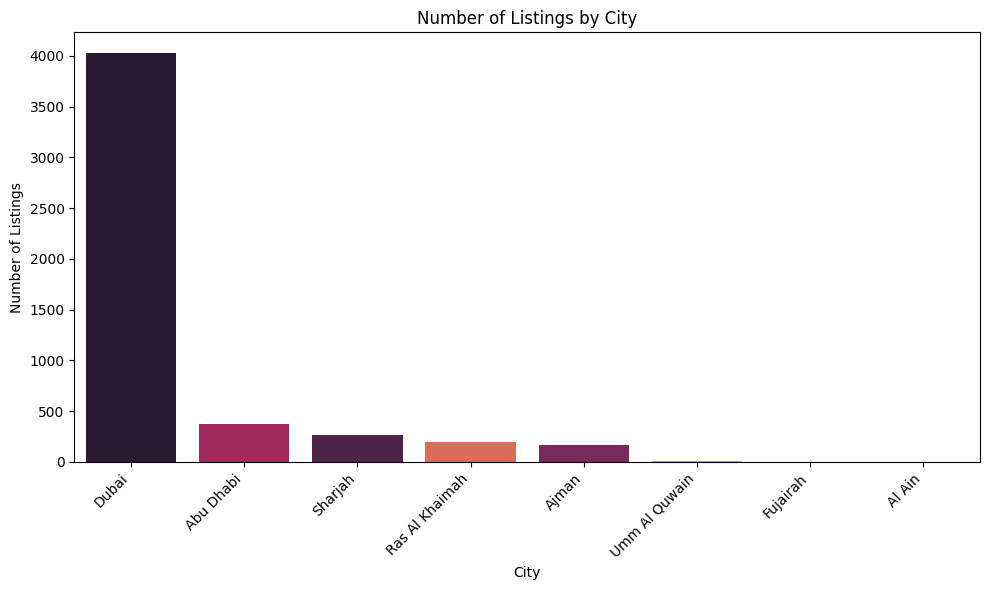

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=df, palette='rocket', hue='city', legend=False,
              order=df['city'].value_counts().index)

plt.title('Number of Listings by City')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

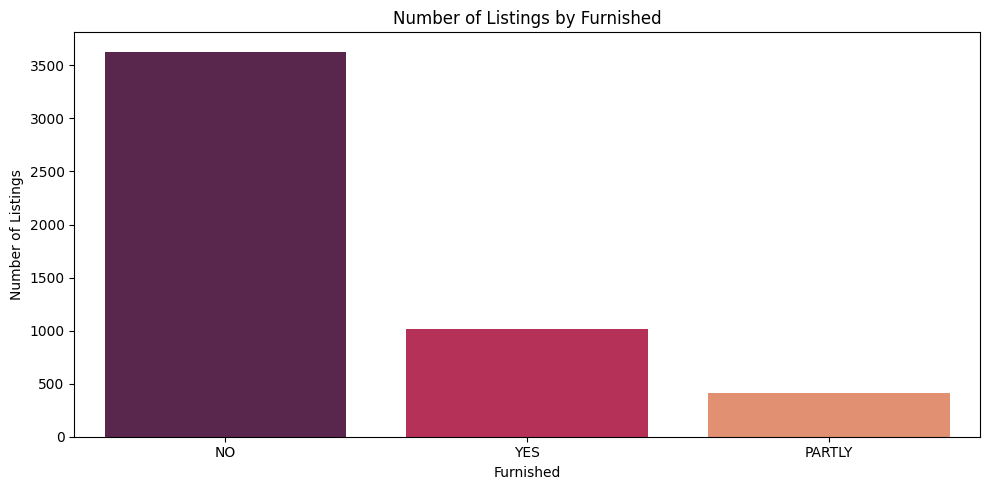

In [127]:
# Number of Listings by furnished
plt.figure(figsize=(10,5)) # Adjust figure size

sns.countplot(x=df['is_furnished'],data = df, palette='rocket',hue='is_furnished', legend=False, order=df['is_furnished'].value_counts().index)
plt.title('Number of Listings by Furnished')
plt.xlabel('Furnished')
plt.ylabel('Number of Listings') 
plt.tight_layout()

plt.show()

# ***C.*** **Bivariate Analysis**
### **This section focuses on visualizing the relationships between pairs of variables.**

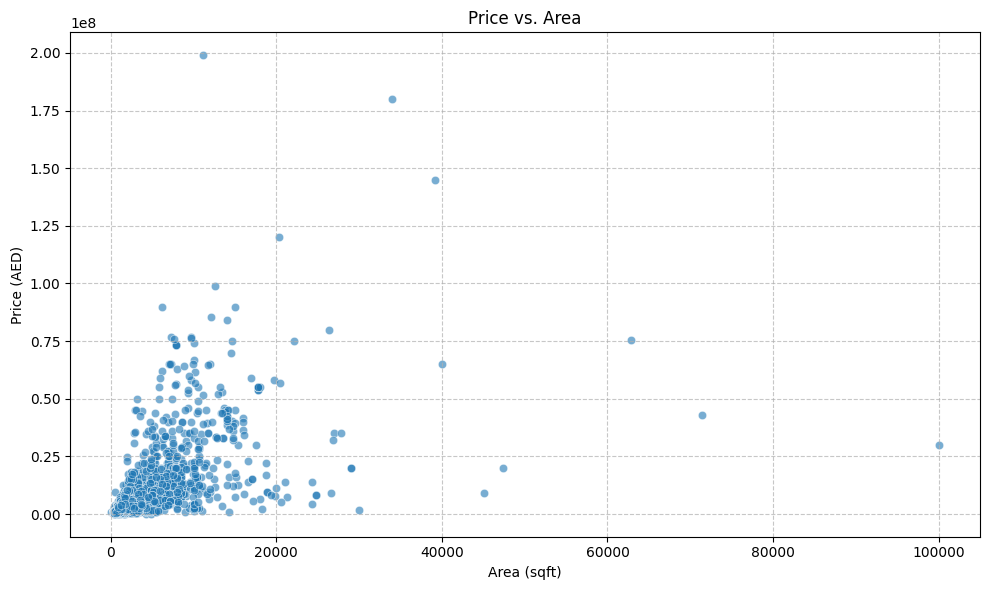

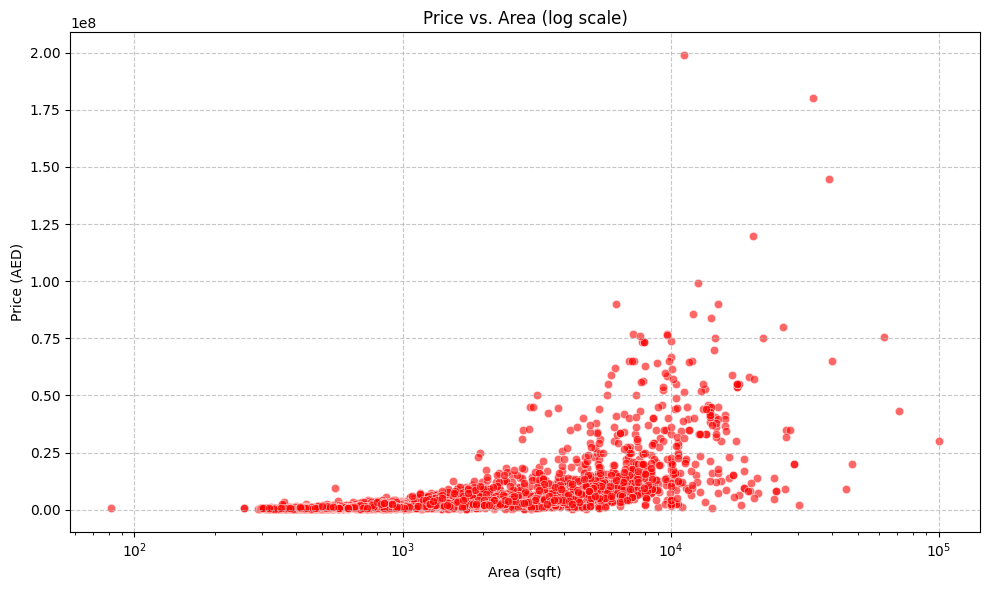

In [128]:
# Price vs. Area (Scatter Plot)

plt.figure(figsize=(10,6))
sns.scatterplot(x='area_sqft', y='price_in_aed', data=df, alpha=0.6)
plt.title('Price vs. Area')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (AED)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# a linear scale would compress all the small values into a tiny space, making them impossible to distinguish. A log scale spreads them out.

plt.figure(figsize=(10,6))
sns.scatterplot(x='area_sqft', y='price_in_aed', data=df, color='red', alpha=0.6)
plt.title('Price vs. Area (log scale)')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (AED)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xscale('log')
plt.tight_layout()
plt.show()


***Let's discuss three points in the above graphs:  First which is nearest zero, tells us that the property have very small area as well as its price accordingly. Second : the property which is largest in area but its price are not too much high, perhaps, because property may not be furnished and location might not be desirable in general. Third property we can understand is that which have very high prices but not that much of area of land. So, there could be assumpstions like property is very valueable because of location and furnishing, etc.***

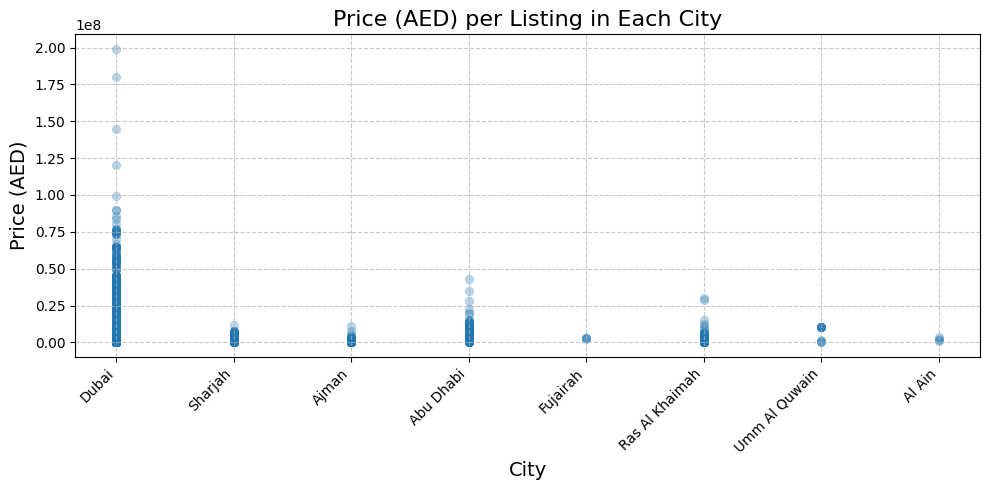

In [129]:
# This will show the relationship between price and area in a more linear fashion, making it easier to see some outliers and trends.

plt.figure(figsize=(10, 5)) 
sns.scatterplot(x='city', y='price_in_aed', data=df, alpha=0.3, edgecolor=None)
plt.title('Price (AED) per Listing in Each City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price (AED)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

# Regression Analysis

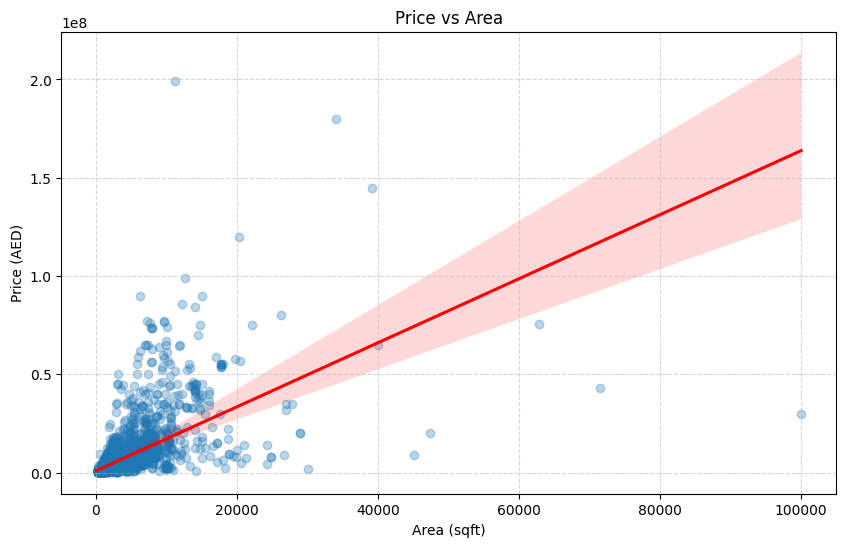

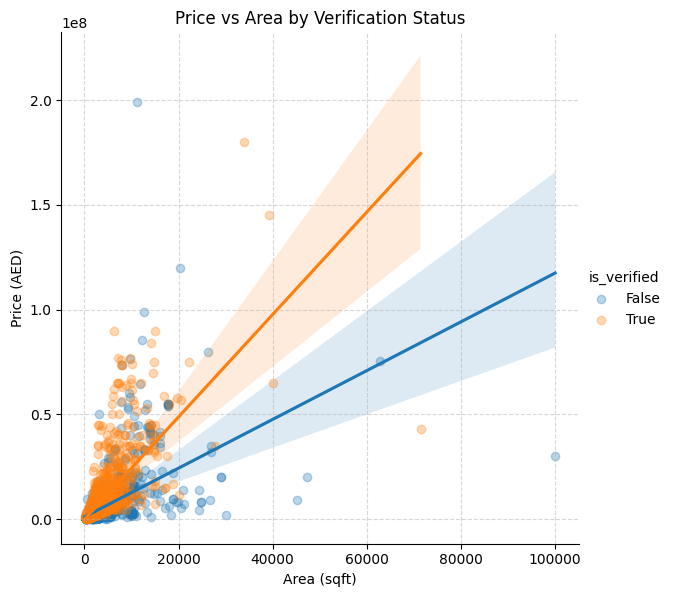

In [130]:
# regression (Price vs Area)
plt.figure(figsize=(10, 6))
sns.regplot(x='area_sqft', y='price_in_aed', data=df.dropna(subset=['area_sqft', 'price_in_aed']), 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Price vs Area')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (AED)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Regression by verification status

sns.lmplot(x='area_sqft', y='price_in_aed', hue='is_verified',
           data=df.dropna(subset=['area_sqft', 'price_in_aed', 'is_verified']),
           scatter_kws={'alpha': 0.3}, height=6)
plt.title('Price vs Area by Verification Status')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (AED)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# ***How to read the scatter plot with regression line:***
***->Positive correlation: The red line is sloping upward, it means larger properties tend to be more expensive.***
***->If points are widely scattered around the line, the relationship is weak or inconsistent.***
***->If points are close to the line, the relationship is stronger.***
***->There are some properties that are very expensive or very cheap for their size.***
***->The shadow around the line indicates the range of prices for properties of a given size. uncertainty in the price prediction. confidence interval is the shade around the line.***

***Verification Status : Trends between verified and non-verified properties. ->The verified line is consistently higher, verified properties may cost more for the same area. It may indicate premium pricing for verified listings, possibly due to higher trust, better quality, or location.***

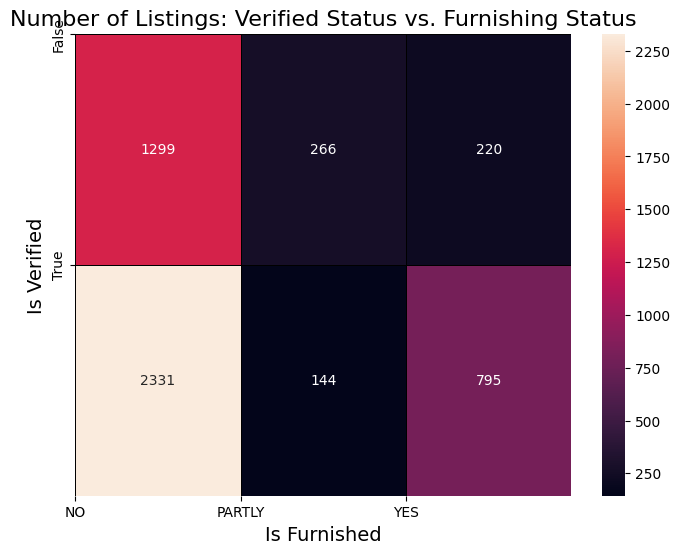

In [131]:
# Heatmap of Crosstabulations, using pd.crosstab()
# Verified vs. Is Furnished
crosstab_verified_furnished = pd.crosstab(df['is_verified'], df['is_furnished'])

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_verified_furnished, annot=True, fmt='d', cmap='rocket', linewidths=.5, linecolor='black')
plt.title('Number of Listings: Verified Status vs. Furnishing Status', fontsize=16)
plt.xlabel('Is Furnished', fontsize=14)
plt.ylabel('Is Verified', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=crosstab_verified_furnished.columns)
plt.yticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

### ***Here have found that 795 listings are furnished as well as verified.***

# ***D.*** **Time-Based Analysis**

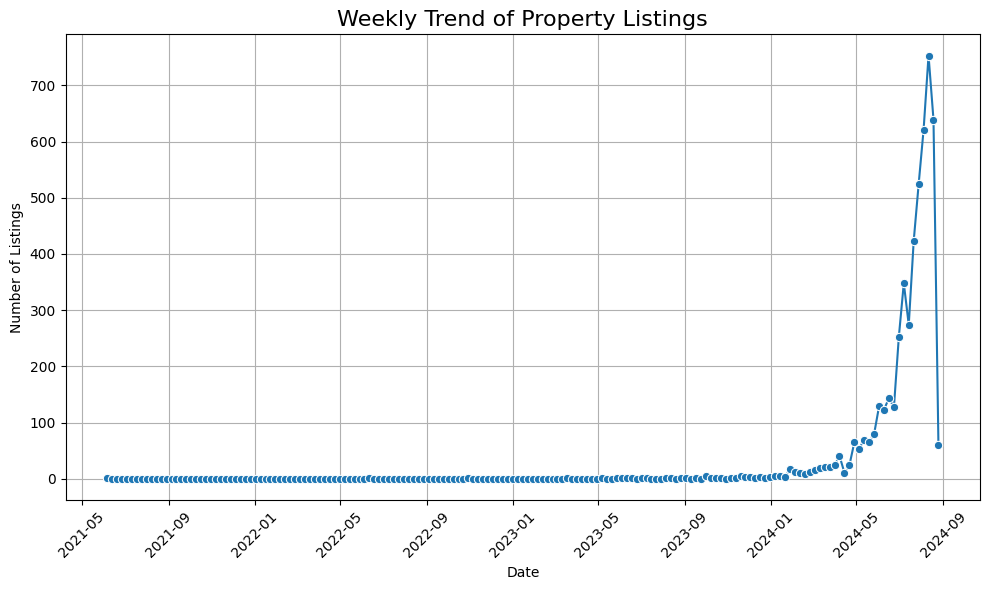

In [132]:
# Listings Trend Over Time (Weekly/Monthly)
# Set 'listed_date' as index for time series resampling
df_time = df.set_index('listed_date')

# Resample to weekly frequency and count listings
weekly_listings = df_time.resample('W').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='listed_date', y='count', data=weekly_listings, marker='o', linestyle='-')
plt.title('Weekly Trend of Property Listings', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

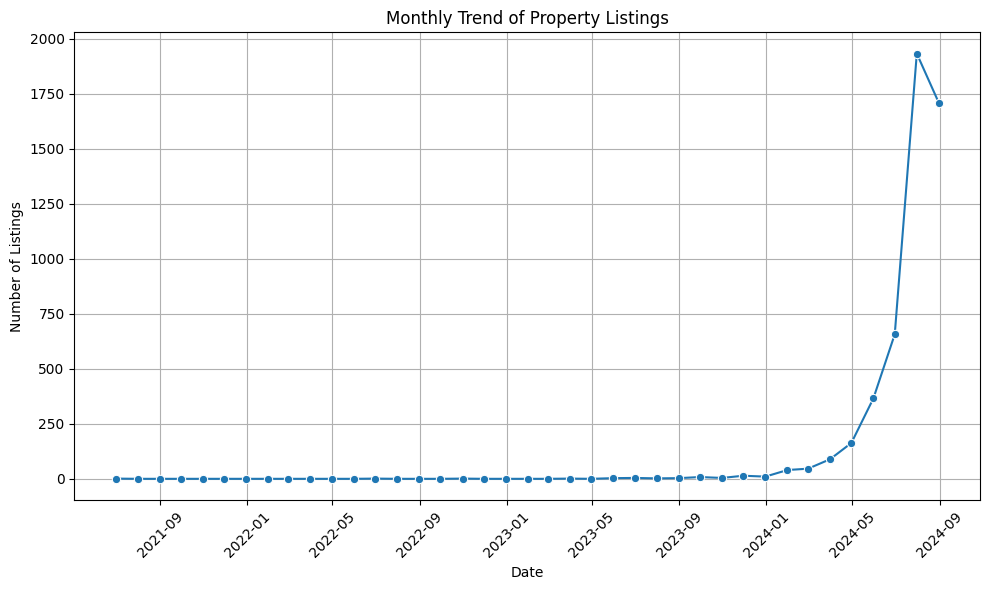

In [133]:
# Monthly Listings Trend:

monthly_listings = df_time.resample('ME').size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(x='listed_date', y='count', data=monthly_listings, marker='o', linestyle='-')
plt.title('Monthly Trend of Property Listings')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

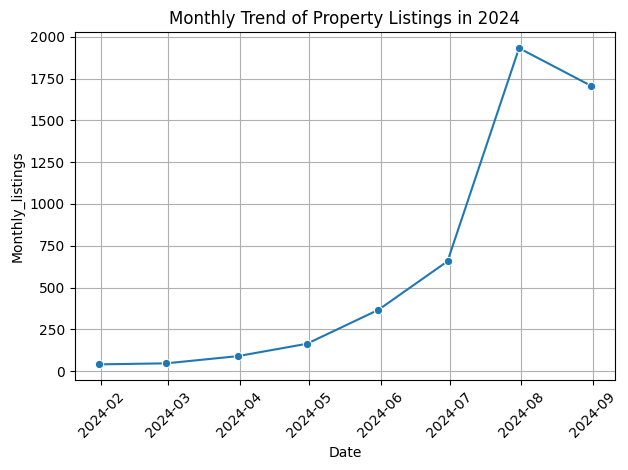

In [134]:
# Here we will see on for 2024 year, number of listings by month

list_2024 = df[df['listed_date'].dt.year==2024]
month_2024 = list_2024.resample('ME', on='listed_date').size().reset_index(name='count')

sns.lineplot(x='listed_date', y='count', data=month_2024, marker='o', linestyle='-')
plt.title('Monthly Trend of Property Listings in 2024')
plt.xlabel('Date')
plt.ylabel('Monthly_listings')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***busy periods : months of 2024 -> may, jun, jul, aug, sep***
### ***quiet periods : months like jan, feb, mar, apr***

# **Feature Engineering**

### ***-> One feature we have already created, price_per_sqft. Next would be the property is luxury or not, we categorize the property on the basis of 'price_in_aed'.***

In [135]:
# Feature name is_luxury
threshold = 10000000

df['is_luxury'] = df['price_in_aed'] > threshold

df[['price_in_aed', 'is_luxury']].head(5)   

,price_in_aed,is_luxury
0,2500000,False
1,7200000,False
2,3600000,False
3,2999999,False
4,2449999,False


In [136]:
# first 10 luxury properties in dataset
df[df['is_luxury'] == True][['price_in_aed', 'is_luxury', 'property_highlights']].head(5)

,price_in_aed,is_luxury,property_highlights
5,25000000,True,Duplex | Penthouse | Best Downtown Views
19,22000000,True,Stunning Upgraded | Duplex PH | Cinema + Gym
35,18000000,True,Exclusive | Duplex Villa | Keys with me!!!
46,23000000,True,Vacant on Transfer | Backing the Lake | Upgraded.
98,15500000,True,Brand New Upgrades | Golf Course View T4


In [137]:
# Top 10 highest priced luxury listings
df.sort_values(by='price_in_aed', ascending=False)[['price_in_aed', 'is_luxury', 'property_highlights']].head(10)

,price_in_aed,is_luxury,property_highlights
3612,199000000,True,Ultra-Luxury | Duplex Penthouse | Branded
1594,180000000,True,Ultra-Luxury Shell and Core Mansion |On Lagoon...
1727,144950000,True,Golf Facing Mansion | Vacant on Transfer
2987,120000000,True,Freehold Independent Brand-New Ready Villa
427,99000000,True,Luxurious &amp; Elegant | Ready 2025 | Sea View
3216,90000000,True,Signature Penthouse Atlantis The Royal- 5 Bedr...
3258,90000000,True,Bespoke Luxury Villa with Lavish Interior Design
1554,85566000,True,Huge Residential Plot | Private Beach Access
1350,84000000,True,Car Elevator | Exclusive | Billionaires Row
3978,80000000,True,Prestigious | Beach Access | Freehold


In [138]:
# Top 10 luxury penthouse 
df[df['property_highlights'].str.contains('penthouse', case=False, na=False)][[
        'area_sqft','property_highlights', 'price_in_aed','is_furnished','city', 'is_luxury']].sort_values(
            by=['price_in_aed','area_sqft'], ascending=False).head(10)    

,area_sqft,property_highlights,price_in_aed,is_furnished,city,is_luxury
3612,11196,Ultra-Luxury | Duplex Penthouse | Branded,199000000,YES,Dubai,True
3216,6239,Signature Penthouse Atlantis The Royal- 5 Bedr...,90000000,NO,Dubai,True
3810,9664,Opulent Oasis | Exquisite Penthouse | Private ...,76500000,NO,Dubai,True
4121,11738,Full Floor Penthouse |Panoramic Palm/Marina View,64541888,NO,Dubai,True
4759,9500,Luxurious Living | Stunning Sea View | Penthouse,60000000,PARTLY,Dubai,True
1644,7912,Luxury Penthouse I Burj Khalifa and Canal View,56500000,NO,Dubai,True
4357,13226,5BR Penthouse | Palm/Sea/Golf View | Ready Q4 ...,55000000,PARTLY,Dubai,True
4653,8968,Royal Amwaj Duplex Penthouse with Private Pool,45000000,YES,Dubai,True
2598,7454,Pinnacle of Luxury | Penthouse | 360º Views,40500000,NO,Dubai,True
2822,4471,Exclusive | Penthouse | By ADRESS RESORTS,36000000,YES,Dubai,True


# **Visualization using Pair Plot**

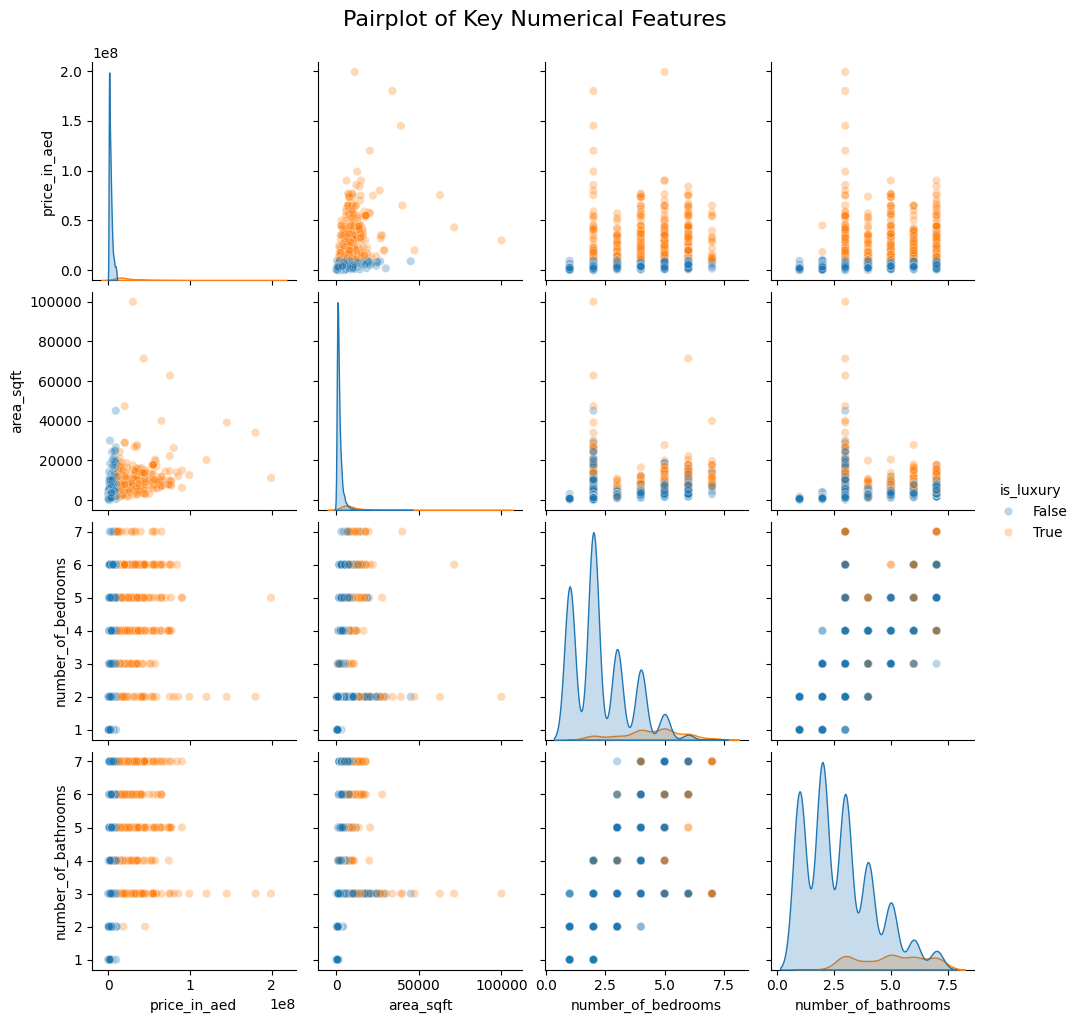

In [139]:
# Pairplot of main numerical features 
num_cols = ['price_in_aed', 'area_sqft','number_of_bedrooms', 'number_of_bathrooms']

sns.pairplot(df.dropna(subset=num_cols + ['is_luxury']), vars=num_cols, hue='is_luxury', diag_kind='kde', plot_kws={'alpha': 0.3})


plt.suptitle('Pairplot of Key Numerical Features', y=1.02, fontsize=16)
plt.show()



***1. we can understand the relationship between area_sqft and price_in_aed as we have seen earlier charts -> in Bivariate Analysis***




# **Viz using Plotly for Interactivity**

In [140]:
import plotly.express as px

In [141]:
# City wise average price for properties
city_avg_price = df.groupby('city')['price_in_aed'].mean().reset_index().sort_values(by='price_in_aed', ascending=False)

# bar chart for 2 cols
fig = px.bar(city_avg_price,x='city',y='price_in_aed',title='City-wise Average Property Prices (AED)',
    labels={'price_in_aed': 'Average Price (AED)', 'city': 'City'},
    color='price_in_aed',
    color_continuous_scale='Reds',
    text_auto='.2s' # so we can see the price in the bar
)

fig.show()



In [142]:
list_2024 = df[df['listed_date'].dt.year==2024]
df_monthly = list_2024.resample('ME', on='listed_date').size().reset_index(name='listing_count') # same code as i used earlier for monthly listings in 2024

fig = px.line(
    df_monthly,  # or df_weekly
    x='listed_date',
    y='listing_count',
    title='📅 Dubai Real Estate Listings Over Time',
    labels={'listed_date': 'Date', 'listing_count': 'Number of Listings'},
    markers=True
)

fig.show()


### ****This is very helpful, let say if we want to visualize the data only from june to sep, then we can select interectively, earlier chart were not that much interective***

# ***Some Problem Solving Through ANalysis***
***1. Which cities have the highest-priced listings?***

***2. How does being “verified” affect pricing?***

***3. Are furnished properties more expensive?***

In [143]:
# 1. Which cities have the highest-priced listings?
df.groupby('city')['price_in_aed'].max().reset_index().sort_values(by='price_in_aed', ascending=False)

,city,price_in_aed
3,Dubai,199000000
0,Abu Dhabi,42999888
5,Ras Al Khaimah,30000000
6,Sharjah,12057000
1,Ajman,11500000
7,Umm Al Quwain,10500000
2,Al Ain,3500000
4,Fujairah,3300000


In [144]:
# 2. How does being “verified” affect pricing?
df.groupby('is_verified')['price_in_aed'].mean().reset_index().sort_values(by='price_in_aed', ascending=False)

,is_verified,price_in_aed
1,True,5.159297e+06
0,False,4.848773e+06


In [145]:
# 3. Are furnished properties more expensive?
df.groupby('is_furnished')['price_in_aed'].mean().reset_index().sort_values(by='price_in_aed', ascending=False)

,is_furnished,price_in_aed
2,YES,5.748398e+06
0,NO,4.950175e+06
1,PARTLY,4.200498e+06
